In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Headlines.csv', encoding='latin-1')
df.head(1)


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,3/1/2000,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title


In [ ]:
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def preprocess_text(text):
    if not isinstance(text, str):
        return text
    tokens = word_tokenize(text)
    tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens if token.isalpha()]
    tokens = [token.lower() for token in tokens]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    stemmer = PorterStemmer()
    tokens_stemmed = [stemmer.stem(token) for token in tokens]
    lemmatizer = WordNetLemmatizer()
    tokens_lemmatized = [lemmatizer.lemmatize(token) for token in tokens_stemmed]
    return tokens_lemmatized

for col in df.columns[1:]:
    df[col] = df[col].apply(preprocess_text)

df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,3/1/2000,0,"[oper, extract, leak, report]",[scorecard],"[hugh, instant, hit, buoy, blue]","[jack, get, skate, alex]","[chao, maracana, build, unit]","[deplet, leicest, prevail, elliott, spoil, eve...","[hungri, spur, sen, rich, pick]","[gunner, wide, easi, target]",...,"[flintoff, injuri, pile, woe, england]","[hunter, threaten, jospin, new, battl, somm]","[kohl, successor, drawn, scandal]","[differ, men, woman]","[sara, denver, nurs, turn, solicitor]","[diana, landmin, crusad, put, torus, panic]","[yeltsin, resign, caught, opposit]","[russian, roulett]",[sold],"[recov, titl]"
1,4/1/2000,0,[scorecard],"[best, lake, scene]","[leader, german, sleaz, inquiri]","[cheerio, boyo]","[main, recommend]","[cubi, kill, fee]","[cubi, kill, fee]","[cubi, kill, fee]",...,"[critic, list]","[time, live]","[dear, doctor]","[irish, court, halt, ira, man, extradit, north...","[burundi, peac, initi, fade, rebel, reject, ma...","[pe, point, way, forward, ecb]","[campaign, keep, pressur, nazi, war, crime, su...","[jane, ratcliff]","[yet, thing, would, know, without, movi]","[millennium, bug, fail, bite]"
2,5/1/2000,0,"[coventri, caught, counter, flo]","[unit, rival, road, rio]","[thatcher, issu, defenc, trial, video]","[polic, help, smith, lay, law, everton]","[tale, trautmann, bear, two, retel]","[england, rack]","[pakistan, retali, call, video, walsh]","[cullinan, continu, cape, monopoli]",...,"[south, melbourn, australia]","[necaxa, mexico]","[real, madrid, spain]","[raja, casablanca, morocco]","[corinthian, brazil]","[toni, pet, project]","[al, nassr, saudi, arabia]","[ideal, holm, show]","[pinochet, leav, hospit, test]","[use, link]"
3,6/1/2000,1,"[pilgrim, know, progress]","[thatcher, face, ban]","[mcilroy, call, irish, fight, spirit]","[leicest, bin, stadium, blueprint]","[unit, brace, mexican, wave]","[aunti, back, fashion, even, dress, look, bit,...","[shoaib, appeal, goe, top]","[hussain, hurt, lay, blame, earlier, damag]",...,"[putin, admit, yeltsin, quit, give, head, start]","[bbc, worst, hit, digit, tv, begin, bite]","[much, pay]","[christma, glitch]","[upend, tabl, chop, line, score, goal]","[scientif, evid, defenc, claim]","[fusco, win, judici, review, extradit, case]","[rebel, thwart, russian, advanc]","[blair, order, fail, nh]","[lesson, law, hard, heart]"
4,7/1/2000,1,"[hitch, horlock]","[beckham, unit, surviv]","[breast, cancer, screen]","[alan, parker]","[guardian, reader, whinger]","[hollywood, beyond]","[ash, diamond]","[whinger, formid, minor]",...,"[everywher, udi]","[want, chloe, lunett]","[return, cane, agenda]","[sleepi, hollow, greeneland]","[blunkett, outlin, vision]","[embattl, dobson, attack, pay, later, livingston]","[doom, dome]",[divid],"[aitken, releas, jail]","[gone, aloft]"


In [ ]:
df['combined_text'] = df[df.columns[1:]].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,combined_text
0,3/1/2000,0,"[oper, extract, leak, report]",[scorecard],"[hugh, instant, hit, buoy, blue]","[jack, get, skate, alex]","[chao, maracana, build, unit]","[deplet, leicest, prevail, elliott, spoil, eve...","[hungri, spur, sen, rich, pick]","[gunner, wide, easi, target]",...,"[hunter, threaten, jospin, new, battl, somm]","[kohl, successor, drawn, scandal]","[differ, men, woman]","[sara, denver, nurs, turn, solicitor]","[diana, landmin, crusad, put, torus, panic]","[yeltsin, resign, caught, opposit]","[russian, roulett]",[sold],"[recov, titl]","0 ['oper', 'extract', 'leak', 'report'] ['scor..."
1,4/1/2000,0,[scorecard],"[best, lake, scene]","[leader, german, sleaz, inquiri]","[cheerio, boyo]","[main, recommend]","[cubi, kill, fee]","[cubi, kill, fee]","[cubi, kill, fee]",...,"[time, live]","[dear, doctor]","[irish, court, halt, ira, man, extradit, north...","[burundi, peac, initi, fade, rebel, reject, ma...","[pe, point, way, forward, ecb]","[campaign, keep, pressur, nazi, war, crime, su...","[jane, ratcliff]","[yet, thing, would, know, without, movi]","[millennium, bug, fail, bite]","0 ['scorecard'] ['best', 'lake', 'scene'] ['le..."
2,5/1/2000,0,"[coventri, caught, counter, flo]","[unit, rival, road, rio]","[thatcher, issu, defenc, trial, video]","[polic, help, smith, lay, law, everton]","[tale, trautmann, bear, two, retel]","[england, rack]","[pakistan, retali, call, video, walsh]","[cullinan, continu, cape, monopoli]",...,"[necaxa, mexico]","[real, madrid, spain]","[raja, casablanca, morocco]","[corinthian, brazil]","[toni, pet, project]","[al, nassr, saudi, arabia]","[ideal, holm, show]","[pinochet, leav, hospit, test]","[use, link]","0 ['coventri', 'caught', 'counter', 'flo'] ['u..."
3,6/1/2000,1,"[pilgrim, know, progress]","[thatcher, face, ban]","[mcilroy, call, irish, fight, spirit]","[leicest, bin, stadium, blueprint]","[unit, brace, mexican, wave]","[aunti, back, fashion, even, dress, look, bit,...","[shoaib, appeal, goe, top]","[hussain, hurt, lay, blame, earlier, damag]",...,"[bbc, worst, hit, digit, tv, begin, bite]","[much, pay]","[christma, glitch]","[upend, tabl, chop, line, score, goal]","[scientif, evid, defenc, claim]","[fusco, win, judici, review, extradit, case]","[rebel, thwart, russian, advanc]","[blair, order, fail, nh]","[lesson, law, hard, heart]","1 ['pilgrim', 'know', 'progress'] ['thatcher',..."
4,7/1/2000,1,"[hitch, horlock]","[beckham, unit, surviv]","[breast, cancer, screen]","[alan, parker]","[guardian, reader, whinger]","[hollywood, beyond]","[ash, diamond]","[whinger, formid, minor]",...,"[want, chloe, lunett]","[return, cane, agenda]","[sleepi, hollow, greeneland]","[blunkett, outlin, vision]","[embattl, dobson, attack, pay, later, livingston]","[doom, dome]",[divid],"[aitken, releas, jail]","[gone, aloft]","1 ['hitch', 'horlock'] ['beckham', 'unit', 'su..."


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['combined_text'])
y = df['Label']

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier()
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for model_name, model in models.items():
    cross_val_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    results[model_name] = {
        'scores': cross_val_scores,
        'mean': cross_val_scores.mean(),
        'std': cross_val_scores.std()
    }

for model_name, result in results.items():
    print(f"{model_name} - Mean Accuracy: {result['mean']:.4f}, Std Dev: {result['std']:.4f}")

Logistic Regression - Mean Accuracy: 0.5106, Std Dev: 0.0052
Naive Bayes - Mean Accuracy: 0.5257, Std Dev: 0.0015
Random Forest - Mean Accuracy: 0.5018, Std Dev: 0.0081


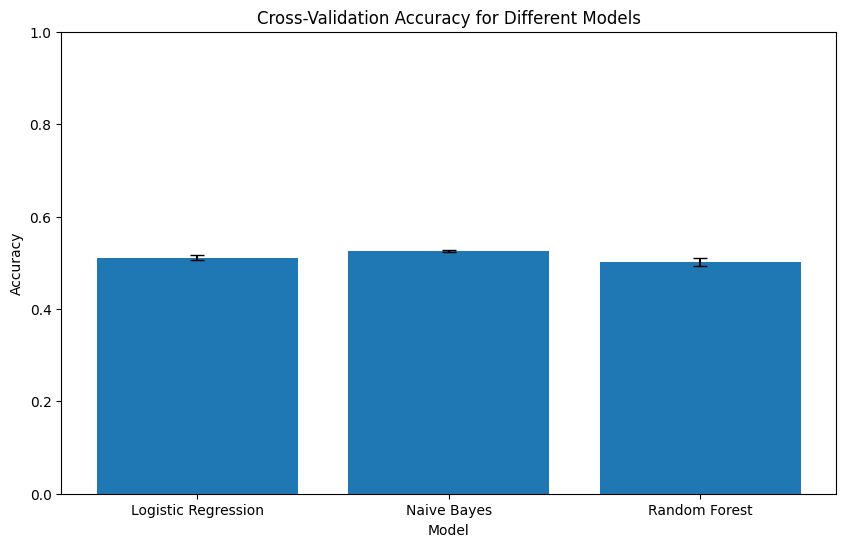

In [ ]:
import matplotlib.pyplot as plt
model_names = list(results.keys())
mean_scores = [results[model]['mean'] for model in model_names]
std_devs = [results[model]['std'] for model in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, mean_scores, yerr=std_devs, capsize=5)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy for Different Models')
plt.ylim(0, 1)
plt.show()